# Final project: Choice 2

## Integrating functions with infinite derivatives using Romberg integration


In this project you will implement Romberg integration in order to evaluate definite integrals.

This code references:
* R L Burden, J D Faires and A M Burden. Numerical Analysis. Cengage Learning, 2016. 

  Library Shelf Mark: QA297 BURD


# Documentation:

Dear respective User, 
Here is brief documentation of how my code is divided into the following blocks within the jyptuernotebook for ease of use. I have included comments throghout for more fine-tuned explanations of code. thanks :)  

### BLOCK 1&2 
output figure_1 & Romberg Integration table: Acomplishing the basic task of integrating I_1 and I_2 using Romberg integration, and implementing algorthym from Burden and Faires. 

### BLOCK 3
outpit figure_3: calculates + plots emprical order of convergence for I_1 and I_2

### BLOCK 4 
output verification table <-- (OMMITED FROM REPORT) 
Tests my algorthym by callign function in block1. Uses example from burden and faires to verify my code.

### BLOCK 5
outputs comarpison table of error results from guass jacobi quadrature method for  I_3 AND plots error

### BLOCK 6
outputs continious_romberg (figure_4): runs Romberg integration for I_3 over 12 hours, continuously updating the plot. I aim to show its inefficiency with singular integral (I_3 using this). I updated title and renamed figure to figure_3 once code finished running. 

## BLOCK 1: Main code for defining the function and the Romberg method

In [59]:
import numpy as np
import matplotlib.pyplot as plt

####################
# define functions #
####################

# Define a function, y(x), that we wish to integrate
# INPUT 	- x: the point at which the function is evaluated
# OUTPUT	- y: the value of the function

def tfunc1(x):
    y = x**0.25
    return y

def tfunc2(x):
    y = 4 * x**4
    return y

	
##############
#  Main code #
##############

def romberg(func, a, b, n):
    # Initialize R array (n x n)
    R = np.zeros((n, n))
    
    # Step 1: Compute initial h and R[0, 0] using the trapezoidal rule
    h = b - a
    R[0, 0] = (h / 2) * (func(a) + func(b))
    
    # Output first approximation
    print(f"R[0, 0] = {R[0, 0]:.8f}")
    
    # Steps 2 and onwards: Compute the Romberg integration
    for i in range(1, n):
        h /= 2  # half the step size
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f  # Trapezoidal approximations
        
        # Richardson extrapolation
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
        
        # Output the current row
        print(f"\nRomberg Table after step {i}:")
        for j in range(i + 1):
            print(f"R[{i}, {j}] = {R[i, j]:.8f}")
        
    return R


# Define the interval [a, b] and the number of extrapolations n
a = 0
b = 1
n = 15  # Number of levels in the Romberg integration
exact_value = 4 / 5  # Exact value of the integral from 0 to 1

# Calculate Romberg tables and errors for both functions
print("Computing Romberg Integration for y = x^(1/4):")
R1 = romberg(tfunc1, a, b, n)
errors1 = [abs(R1[i, i] - exact_value) for i in range(n)]

print("\nComputing Romberg Integration for y = 4x^4:")
R2 = romberg(tfunc2, a, b, n)
errors2 = [abs(R2[i, i] - exact_value) for i in range(n)]



Computing Romberg Integration for y = x^(1/4):
R[0, 0] = 0.50000000

Romberg Table after step 1:
R[1, 0] = 0.67044821
R[1, 1] = 0.72726428

Romberg Table after step 2:
R[2, 0] = 0.74465201
R[2, 1] = 0.76938662
R[2, 2] = 0.77219477

Romberg Table after step 3:
R[3, 0] = 0.77650773
R[3, 1] = 0.78712630
R[3, 2] = 0.78830894
R[3, 3] = 0.78856472

Romberg Table after step 4:
R[4, 0] = 0.79006727
R[4, 1] = 0.79458712
R[4, 2] = 0.79508451
R[4, 3] = 0.79519206
R[4, 4] = 0.79521805

Romberg Table after step 5:
R[5, 0] = 0.79580993
R[5, 1] = 0.79772415
R[5, 2] = 0.79793329
R[5, 3] = 0.79797851
R[5, 4] = 0.79798944
R[5, 5] = 0.79799214

Romberg Table after step 6:
R[6, 0] = 0.79823483
R[6, 1] = 0.79904312
R[6, 2] = 0.79913106
R[6, 3] = 0.79915007
R[6, 4] = 0.79915466
R[6, 5] = 0.79915580
R[6, 6] = 0.79915609

Romberg Table after step 7:
R[7, 0] = 0.79925697
R[7, 1] = 0.79959768
R[7, 2] = 0.79963465
R[7, 3] = 0.79964265
R[7, 4] = 0.79964458
R[7, 5] = 0.79964506
R[7, 6] = 0.79964518
R[7, 7] = 0.799

##  BLOCK 2: Error plotting

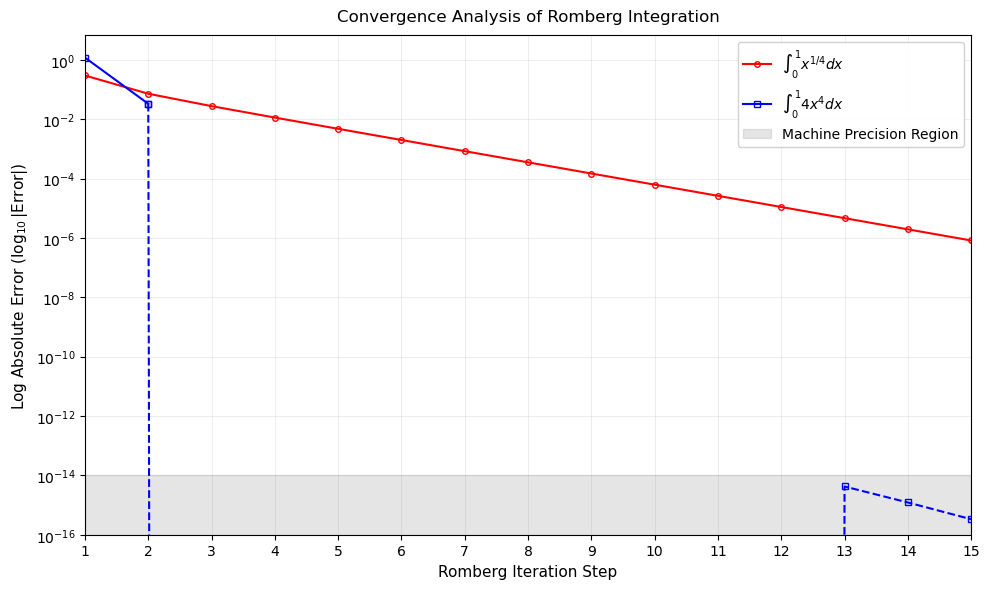

In [61]:
# NOTE: PRELIMARY - RUN BLOCK 1! 
plt.figure(figsize=(10, 6))
steps = np.arange(1, n + 1)

# Plot x^(1/4) curve
plt.semilogy(steps, errors1, 'r-', label=r'$\int_0^1 x^{1/4} dx$', 
             linewidth=1.5, markersize=4, marker='o', markerfacecolor='none')

# Plot 4x^4 curve with transition at machine precision
cutoff_idx = next((i for i, err in enumerate(errors2) if err < 1e-14), len(errors2))
plt.semilogy(steps[:cutoff_idx], errors2[:cutoff_idx], 'b-',  
             label=r'$\int_0^1 4x^4 dx$',
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')
plt.semilogy(steps[cutoff_idx-1:], errors2[cutoff_idx-1:], 'b--',  
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')

#  machine precision region
plt.fill_between(steps, 1e-16, 1e-14, color='grey', alpha=0.2,
                 label='Machine Precision Region')

# Set labels, title, legend and other stuff to make it look nice and clean
plt.xlabel('Romberg Iteration Step', fontsize=11)
plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
plt.title('Convergence Analysis of Romberg Integration', 
          fontsize=12, pad=10)
plt.grid(True, which='both', linestyle='-', alpha=0.2, color='grey', linewidth=0.5)
plt.xlim(1, n)
plt.ylim(1e-16, 7e0)
plt.xticks(steps)
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.tight_layout()

plt.savefig('final_project/figure_1.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()




##  BLOCK 3: Emperical Order of Convergence

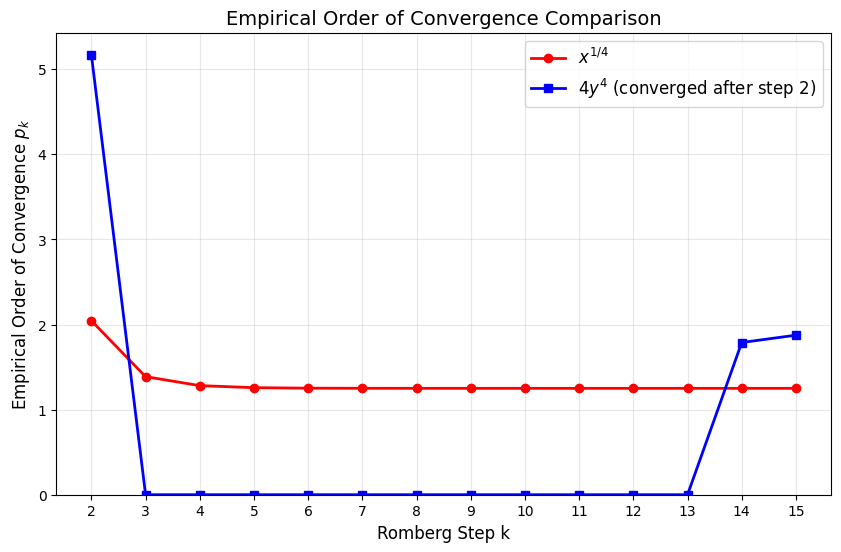

In [3]:
#  p-value calculation
def calculate_p_values(errors):
    p_values = []
    for k in range(1, len(errors)):
        if errors[k] != 0 and errors[k-1] != 0:
            p = np.log(errors[k]/errors[k-1]) / np.log(0.5)
            p_values.append(p)
        else:
            p_values.append(0) 
    return np.array(p_values)

# Calculate p values
p_values1 = calculate_p_values(errors1)
p_values2 = calculate_p_values(errors2)

# Create plot
plt.figure(figsize=(10, 6))
k_values = np.arange(2, n+1)
plt.plot(k_values, p_values1, 'ro-', label=r'$x^{1/4}$', linewidth=2, markersize=6)
plt.plot(k_values, np.ma.masked_where(errors2[1:] == 0, p_values2), 
         'bs-', label=r'$4y^4$ (converged after step 2)', linewidth=2, markersize=6)

plt.xlabel('Romberg Step k', fontsize=12)
plt.ylabel('Empirical Order of Convergence $p_k$', fontsize=12)
plt.title('Empirical Order of Convergence Comparison', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(bottom=0)
plt.xticks(k_values)

plt.savefig('final_project/figure_2.pdf',
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()



##  BLOCK 4:Testing Romberg iteration alogrthym with Example 1, Pg 213-215 from Burden and Faires (Edition 10)

In [4]:
# NOTE: This is all mentioned briefly in one concice short line in my report for berevity. 
# NOTE: SCROLL DOWN TO TH E VERY BOTTOM OF THE OUTPUT FROM THIS PLEASE!

# these are pulled from Burden & Faires, Table 4.9 pg 215 (exampel 1!)
book_table = {
    'R11': 0.00000000,
    'R21': 1.57079633,
    'R31': 1.89611890,
    'R41': 1.97423160,
    'R51': 1.99357034,
    'R22': 2.09439511,
    'R32': 2.00455976,
    'R42': 2.00026917,
    'R33': 1.99857073,
    'R43': 1.99998313,
    'R53': 1.99999975,
    'R44': 2.00000555,
    'R54': 2.00000001,
    'R55': 1.99999999
}

def test_sin(x):
    return np.sin(x)

# these are the parameters for the test 
a_test = 0
b_test = np.pi
n_test = 5

# run da Romberg integration
print("\nComputing Romberg Integration for y = sin(x):")
R_test = romberg(test_sin, a_test, b_test, n_test)

# print Romberg table comparison
print("\nComparison with Book's Table 4.9:")
print("================================")
print(f"{'Entry':<8} {'Book Value':<15} {'Our Value':<15} {'Absolute Error':<15}")
print("-" * 55)

# foarmatting for printing entire Romberg table as shown in very very nicely in book 
for i in range(5):
    for j in range(i+1):
        book_key = f'R{i+1}{j+1}'
        if book_key in book_table:
            our_value = R_test[i,j]
            error = abs(our_value - book_table[book_key])
            print(f"R[{i+1},{j+1}]  {book_table[book_key]:<15.8f} {our_value:<15.8f} {error:<15.2e}")



Computing Romberg Integration for y = sin(x):
R[0, 0] = 0.00000000

Romberg Table after step 1:
R[1, 0] = 1.57079633
R[1, 1] = 2.09439510

Romberg Table after step 2:
R[2, 0] = 1.89611890
R[2, 1] = 2.00455975
R[2, 2] = 1.99857073

Romberg Table after step 3:
R[3, 0] = 1.97423160
R[3, 1] = 2.00026917
R[3, 2] = 1.99998313
R[3, 3] = 2.00000555

Romberg Table after step 4:
R[4, 0] = 1.99357034
R[4, 1] = 2.00001659
R[4, 2] = 1.99999975
R[4, 3] = 2.00000002
R[4, 4] = 1.99999999

Comparison with Book's Table 4.9:
Entry    Book Value      Our Value       Absolute Error 
-------------------------------------------------------
R[1,1]  0.00000000      0.00000000      1.92e-16       
R[2,1]  1.57079633      1.57079633      3.21e-09       
R[2,2]  2.09439511      2.09439510      7.61e-09       
R[3,1]  1.89611890      1.89611890      2.06e-09       
R[3,2]  2.00455976      2.00455975      5.02e-09       
R[3,3]  1.99857073      1.99857073      1.82e-09       
R[4,1]  1.97423160      1.97423160    

## BLOCK 5: Guass-Jacobi Quadrature Method


Convergence Table for I:
  n |       Computed Value |        Error
------------------------------------------------------------
  1 |      19.714639489050 |     3.55e-15
  2 |      19.714639489050 |     3.55e-15
  3 |      19.714639489050 |     7.11e-15
  4 |      19.714639489050 |     3.55e-15
  5 |      19.714639489050 |     7.11e-15
  6 |      19.714639489050 |     3.55e-15
  7 |      19.714639489050 |     0.00e+00
  8 |      19.714639489050 |     0.00e+00
  9 |      19.714639489050 |     0.00e+00
 10 |      19.714639489050 |     0.00e+00
Exact Value:      19.714639489050
------------------------------------------------------------


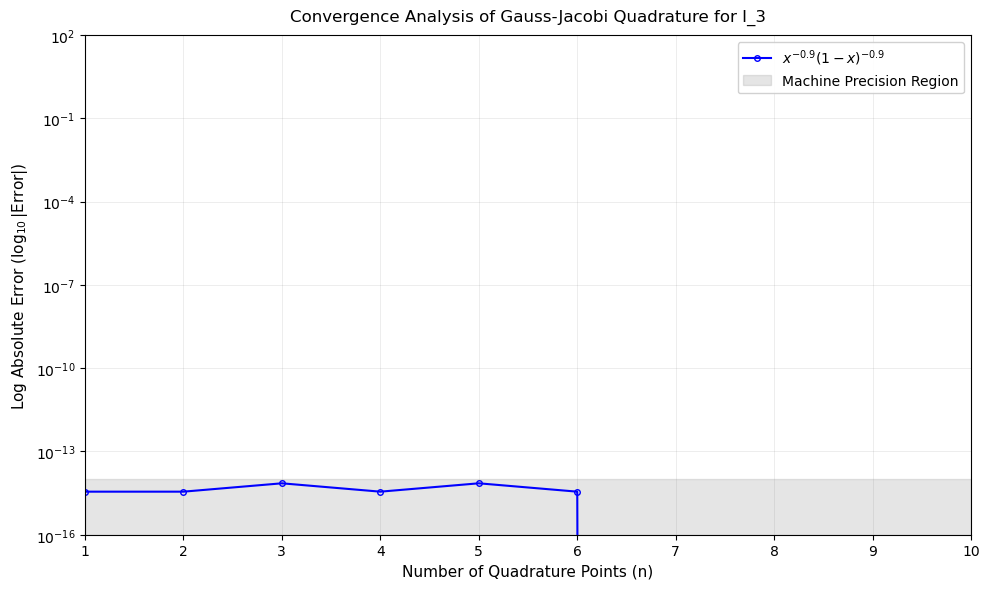

In [57]:
import numpy as np
from scipy.special import roots_jacobi, gamma

# compute the exact value of the integral using the Beta function
def exact_integral():
    # I = B(0.1, 0.1)
    a = 0.1
    b = 0.1
    return gamma(a) * gamma(b) / gamma(a + b)

# define quadrature orders to test
test_points = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
results = []

# alpha and beta for Gauss-Jacobi quadrature
alpha = -0.9  # corresponds to (1 - t)^{-0.9}
beta = -0.9   # corresponds to (1 + t)^{-0.9}

# scaling factor due to variable transformation
C = 2 ** 0.8  # Since C = 2^{(1.8 - 1)} = 2^{0.8}

# loop over different numbers of quadrature points
for n in test_points:
    # get nodes and weights for Gauss-Jacobi quadrature with given alpha and beta
    nodes, weights = roots_jacobi(n, alpha, beta)
    integral = C * np.sum(weights)
    # compute the absolute error
    exact_value = exact_integral()
    error = abs(exact_value - integral)
    # store the results
    results.append([n, integral, error])

# print the results in a table
print("\nConvergence Table for I:")
print("=" * 60)
print(f"{'n':>3} | {'Computed Value':>20} | {'Error':>12}")
print("-" * 60)
for n, val, err in results:
    print(f"{n:3d} | {val:20.12f} | {err:12.2e}")
print("=" * 60)
print(f"Exact Value: {exact_value:20.12f}")
print("-" * 60)

# da plotting
plt.figure(figsize=(10, 6))

# extract data from results
n_values = [n for n, _, _ in results]
errors = [err for _, _, err in results]

plt.semilogy(n_values, errors, 'b-', 
             label='$x^{-0.9}(1-x)^{-0.9}$', 
             linewidth=1.5, marker='o', markersize=4, markerfacecolor='none')
plt.fill_between([1, 10], 1e-16, 1e-14, 
                 color='grey', alpha=0.2,
                 label='Machine Precision Region')

plt.xlabel('Number of Quadrature Points (n)', fontsize=11)
plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
plt.title('Convergence Analysis of Gauss-Jacobi Quadrature for I_3', 
         fontsize=12, pad=10)
plt.grid(True, which='both', linestyle='-', alpha=0.2, 
         color='grey', linewidth=0.5)
plt.xlim(1, 10)
plt.ylim(1e-16, 1e2)
plt.xticks(n_values)
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.tight_layout()

# save the plot
plt.savefig('final_project/figure_4.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()



## BLOCK 6: showing rhomberg integration for I_3 + plotting

In [64]:
# this is to show how rhomberg integration is very inefficient for I_3. This script runs for 12 hours. 
# If you dont wish to run it, I have already ran it for 12 hours and left the boilerplate cached as output. 

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import time
from datetime import datetime, timedelta

def f(x):
    if x <= 0 or x >= 1:
        return 0
    return np.exp(-0.9 * np.log(x) - 0.9 * np.log(1 - x))

# this is just the exact same code as BLOCK 1
def romberg(func, a, b, n):
    R = np.zeros((n, n))
    h = b - a
    R[0, 0] = (h / 2) * (func(a + 1e-10) + func(b - 1e-10))
    
    for i in range(1, n):
        h /= 2
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
    return R

#  this does the plotting, iterating steps and time-checking. 
def main():
    exact_value = gamma(0.1) * gamma(0.1) / gamma(0.2)
    start_time = datetime.now()
    end_time = start_time + timedelta(hours=12)
    n = 2
    while datetime.now() < end_time:
        # create new fig for each iteration
        plt.figure(figsize=(10, 6))
        
        R = romberg(f, 0, 1, n)
        errors = [abs(R[i, i] - exact_value) for i in range(n)]
        steps = np.arange(1, n + 1)
        
        # Plot
        plt.semilogy(steps, errors, 'b-', label='$x^{-0.9}(1-x)^{-0.9}$', 
                     linewidth=1.5, marker='o', markersize=4, markerfacecolor='none')
        plt.fill_between(steps, 1e-16, 1e-14, color='grey', alpha=0.2,
                         label='Machine Precision Region')
        plt.xlabel('Romberg Iteration Step', fontsize=11)
        plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
        plt.title(f'Convergence Analysis of Romberg Integration\nIteration {n}, Time: {datetime.now().strftime("%H:%M:%S")}', 
                  fontsize=12, pad=10)
        plt.grid(True, which='both', linestyle='-', alpha=0.2, color='grey', linewidth=0.5)
        plt.xlim(1, n)
        plt.ylim(1e-16, 1e10)
        plt.xticks(steps)
        plt.legend(loc='lower right', fontsize=10, framealpha=0.9)
        plt.tight_layout()
        plt.savefig('final_project/continuous_romberg.pdf', 
                    bbox_inches='tight', dpi=300, format='pdf')
        plt.close()  
        
        # Print status
        time_elapsed = datetime.now() - start_time
        print(f"Iteration {n} completed. Time elapsed: {time_elapsed}")
        
        n += 1
        time.sleep(1)  # 1 sec delay between iterations

if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\nProcess interrupted by user")
    finally:
        plt.close('all')


Iteration 2 completed. Time elapsed: 0:00:00.531057
Iteration 3 completed. Time elapsed: 0:00:01.687011
Iteration 4 completed. Time elapsed: 0:00:02.844640
Iteration 5 completed. Time elapsed: 0:00:04.024151
Iteration 6 completed. Time elapsed: 0:00:05.193398
Iteration 7 completed. Time elapsed: 0:00:06.378227
Iteration 8 completed. Time elapsed: 0:00:07.540159
Iteration 9 completed. Time elapsed: 0:00:08.716133
Iteration 10 completed. Time elapsed: 0:00:09.892981
Iteration 11 completed. Time elapsed: 0:00:11.090097
Iteration 12 completed. Time elapsed: 0:00:12.266629
Iteration 13 completed. Time elapsed: 0:00:13.443198
Iteration 14 completed. Time elapsed: 0:00:14.644845
Iteration 15 completed. Time elapsed: 0:00:16.012267
Iteration 16 completed. Time elapsed: 0:00:17.221421
Iteration 17 completed. Time elapsed: 0:00:18.489342
Iteration 18 completed. Time elapsed: 0:00:19.833727
Iteration 19 completed. Time elapsed: 0:00:21.327555
Iteration 20 completed. Time elapsed: 0:00:23.195358
I